<a href="https://www.kaggle.com/code/mennatullaheisawy/flood-prediction-using-ann-with-r2-score-0-8448?scriptVersionId=184787712" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import r2_score

2024-06-21 20:00:58.418369: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-21 20:00:58.418491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-21 20:00:58.564417: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Reading the Data

In [62]:
data = pd.read_csv(r'/kaggle/input/playground-series-s4e5/train.csv')
test = pd.read_csv(r'/kaggle/input/playground-series-s4e5/test.csv')
train = data.copy()

### EDA and Preprocessing

In [3]:
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


##### Set the index with the ID column

In [4]:
train.set_index(train['id'], inplace=True)
train.drop(columns=['id'], inplace=True)
train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [66]:
# do the same for the test
test.set_index(test['id'], inplace=True)
test.drop(columns=['id'], inplace=True)
test.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
id,,,,,,,,,,,,,,,,,,,,
1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null  int6

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745305 entries, 1117957 to 1863261
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   MonsoonIntensity                 745305 non-null  int64
 1   TopographyDrainage               745305 non-null  int64
 2   RiverManagement                  745305 non-null  int64
 3   Deforestation                    745305 non-null  int64
 4   Urbanization                     745305 non-null  int64
 5   ClimateChange                    745305 non-null  int64
 6   DamsQuality                      745305 non-null  int64
 7   Siltation                        745305 non-null  int64
 8   AgriculturalPractices            745305 non-null  int64
 9   Encroachments                    745305 non-null  int64
 10  IneffectiveDisasterPreparedness  745305 non-null  int64
 11  DrainageSystems                  745305 non-null  int64
 12  CoastalVulnerability        

* ##### The data has no null values

#### X, y definition

In [8]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]
X.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
id,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3
1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3
2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3
3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5
4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5


#### Train Val Splitting

In [9]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1006161, 20)
(1006161,)
(111796, 20)
(111796,)


### Building Model Architecture 

In [10]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.1),
    
    Dense(32, activation='relu'),
    Dropout(0.1),
    
    Dense(16, activation='relu'),
    Dense(1, activation='linear'),

])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['r2_score'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
call_back = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True , verbose=0)

In [12]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks= call_back , validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.0133 - r2_score: -4.2201 - val_loss: 0.0107 - val_r2_score: -3.0985
Epoch 2/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 4.8870e-04 - r2_score: 0.8122 - val_loss: 0.0087 - val_r2_score: -2.3461
Epoch 3/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 4.5869e-04 - r2_score: 0.8239 - val_loss: 0.0090 - val_r2_score: -2.4804
Epoch 4/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 4.4385e-04 - r2_score: 0.8294 - val_loss: 0.0098 - val_r2_score: -2.7763
Epoch 5/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 4.3676e-04 - r2_score: 0.8321 - val_loss: 0.0089 - val_r2_score: -2.4325
Epoch 6/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 4.3060e-04 - r2_score: 0.8346 - val_loss: 0.0085 - val_r2_score: -2.2699
Epoch 7/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 4.2908e-04 - r2_score: 0.8352 - val_loss: 0.0074 - val_r2_score: -1.8315
Epoch 8/100
15722/15722 ━━━━━━

### Plotting Model Loss Through the Epochs

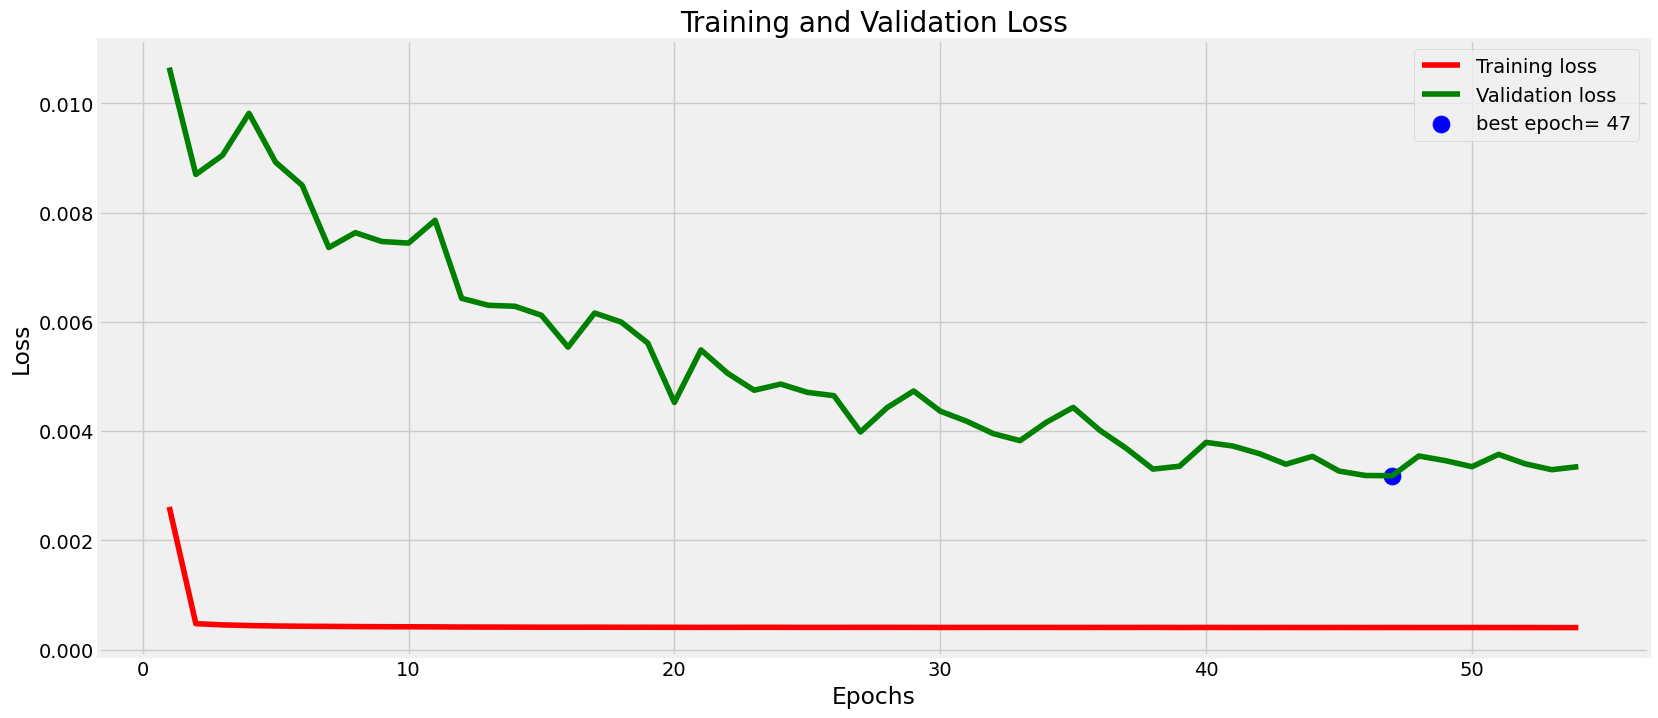

In [13]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()


##### Printing the maximum shown value in the validation r2_score

In [25]:
max(history.history['val_r2_score'])

-0.22521686553955078

In [14]:
model2 = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.1),
    
    Dense(16, activation='relu'),
    Dense(1, activation='linear'),

])

model2.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['r2_score'])
model2.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
call_back2 = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True , verbose=0)

In [16]:
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=64, callbacks= call_back2 , validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - loss: 0.6084 - r2_score: -231.6812 - val_loss: 0.0015 - val_r2_score: 0.4362
Epoch 2/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 0.0012 - r2_score: 0.5388 - val_loss: 0.0028 - val_r2_score: -0.0707
Epoch 3/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 5.5613e-04 - r2_score: 0.7868 - val_loss: 0.0035 - val_r2_score: -0.3424
Epoch 4/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 4.6620e-04 - r2_score: 0.8213 - val_loss: 0.0032 - val_r2_score: -0.2188
Epoch 5/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 4.4671e-04 - r2_score: 0.8285 - val_loss: 0.0040 - val_r2_score: -0.5299
Epoch 6/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 4.3993e-04 - r2_score: 0.8315 - val_loss: 0.0034 - val_r2_score: -0.3241
Epoch 7/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 4.3452e-04 - r2_score: 0.8332 - val_loss: 0.0034 - val_r2_score: -0.3153
Epoch 8/100
15722/15722 ━━━━━━━━━

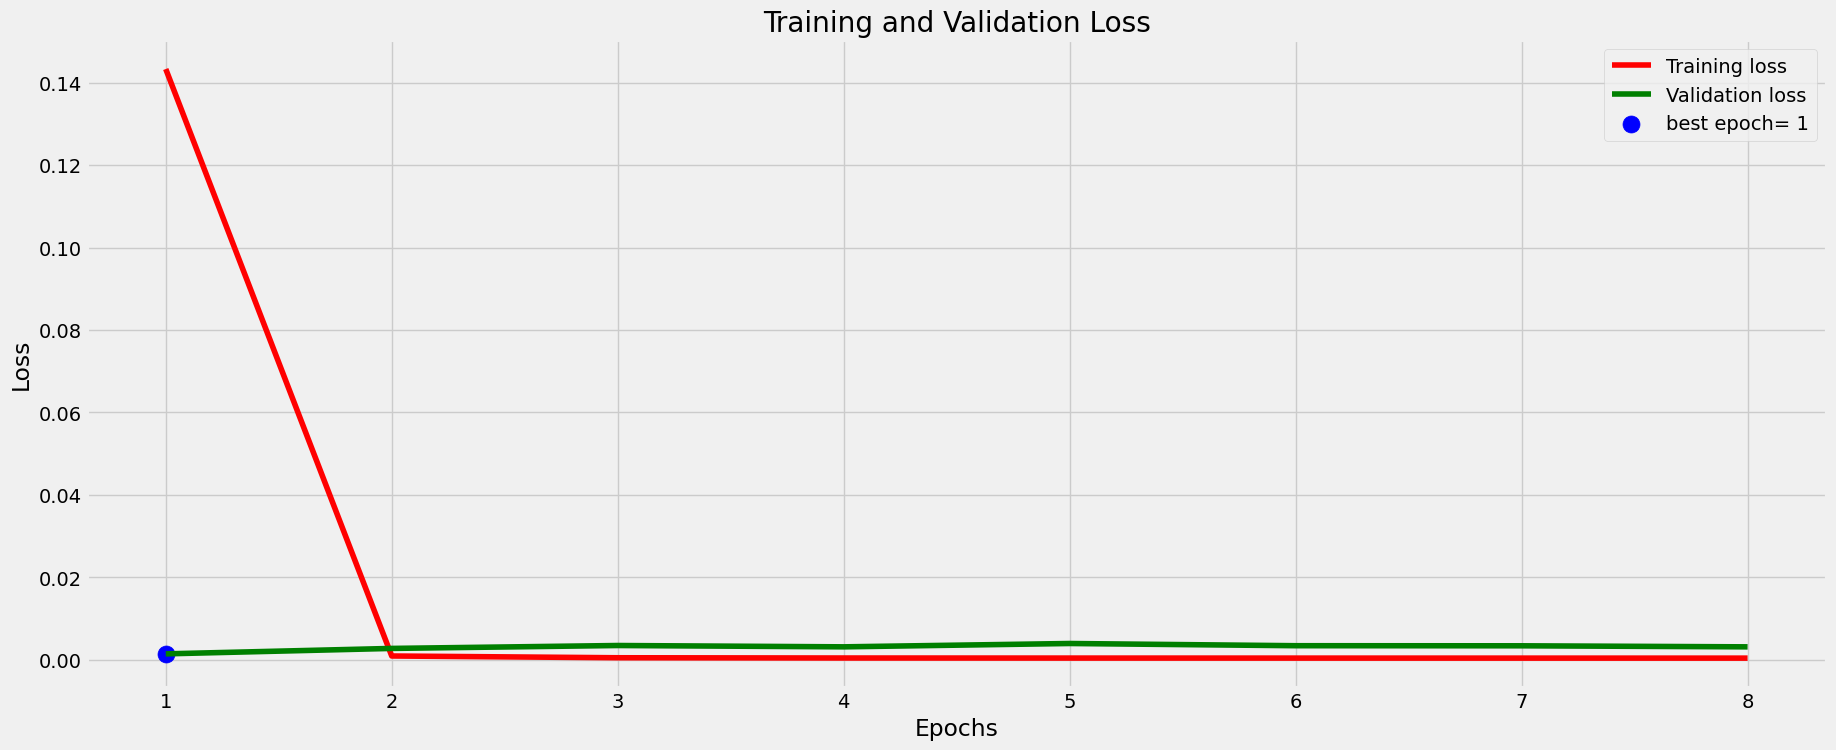

In [17]:
# Define needed variables
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()


In [23]:
max(history2.history['val_r2_score'])

0.43620914220809937

In [26]:
model3 = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),    
    Dense(8, activation='relu'),
    Dense(1, activation='linear'),

])

model3.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['r2_score'])
model3.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
call_back3 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True , verbose=0)

In [28]:
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=64, callbacks= call_back3 , validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 0.0345 - r2_score: -12.2428 - val_loss: 4.1918e-04 - val_r2_score: 0.8388
Epoch 2/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 4.3277e-04 - r2_score: 0.8337 - val_loss: 4.0901e-04 - val_r2_score: 0.8427
Epoch 3/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 4.2605e-04 - r2_score: 0.8364 - val_loss: 4.0500e-04 - val_r2_score: 0.8442
Epoch 4/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 4.2449e-04 - r2_score: 0.8375 - val_loss: 4.0972e-04 - val_r2_score: 0.8424
Epoch 5/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 4.2024e-04 - r2_score: 0.8387 - val_loss: 5.4385e-04 - val_r2_score: 0.7908
Epoch 6/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - loss: 4.1995e-04 - r2_score: 0.8392 - val_loss: 4.4736e-04 - val_r2_score: 0.8279
Epoch 7/100
15722/15722 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - loss: 4.1706e-04 - r2_score: 0.8400 - val_loss: 4.0425e-04 - val_r2_score: 0.8445
Epoch 8/

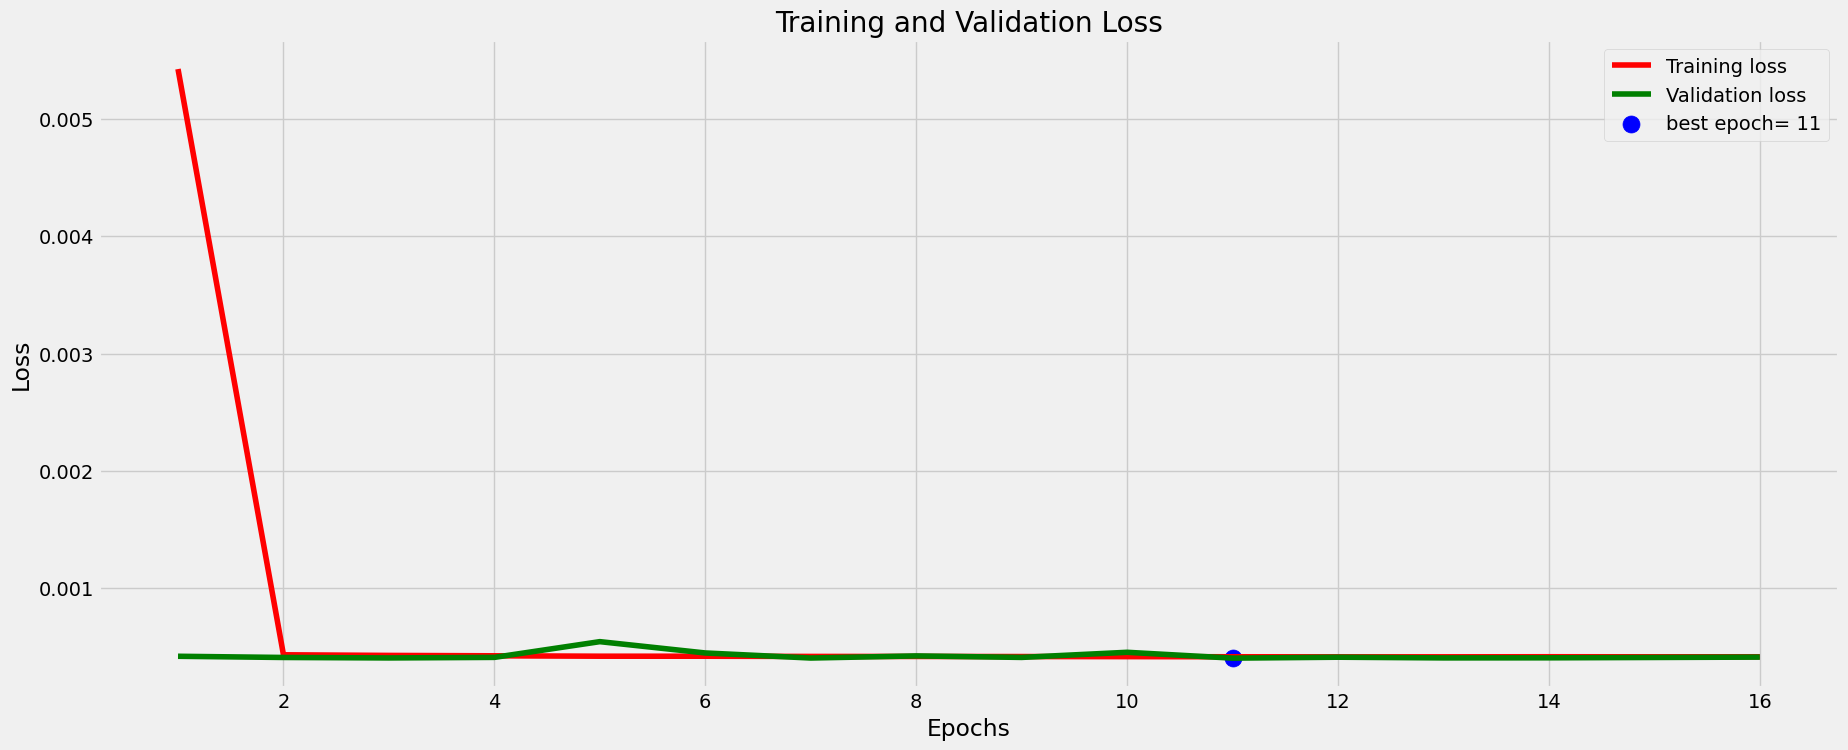

In [29]:
# Define needed variables
tr_loss = history3.history['loss']
val_loss = history3.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()


In [30]:
max(history3.history['val_r2_score'])

0.8448330163955688

In [37]:
model4 = Sequential([
    Dense(8, activation='relu', input_dim=X_train.shape[1]),    
    Dense(1, activation='linear'),

])

model4.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error', metrics=['r2_score'])
model4.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 8)              │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
call_back4 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True , verbose=0)

In [39]:
history4 = model4.fit(X_train, y_train, epochs=100, batch_size=32, callbacks= call_back4 , validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
31443/31443 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - loss: 0.0444 - r2_score: -16.0484 - val_loss: 0.0025 - val_r2_score: 0.0420
Epoch 2/100
31443/31443 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.0024 - r2_score: 0.0684 - val_loss: 0.0023 - val_r2_score: 0.1002
Epoch 3/100
31443/31443 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.0023 - r2_score: 0.1176 - val_loss: 0.0023 - val_r2_score: 0.1163
Epoch 4/100
31443/31443 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.0022 - r2_score: 0.1446 - val_loss: 0.0022 - val_r2_score: 0.1620
Epoch 5/100
31443/31443 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.0022 - r2_score: 0.1705 - val_loss: 0.0021 - val_r2_score: 0.1865
Epoch 6/100
31443/31443 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - loss: 0.0021 - r2_score: 0.1978 - val_loss: 0.0021 - val_r2_score: 0.2019
Epoch 7/100
31443/31443 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - loss: 0.0020 - r2_score: 0.2266 - val_loss: 0.0019 - val_r2_score: 0.2503
Epoch 8/100
31443/31443 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - 

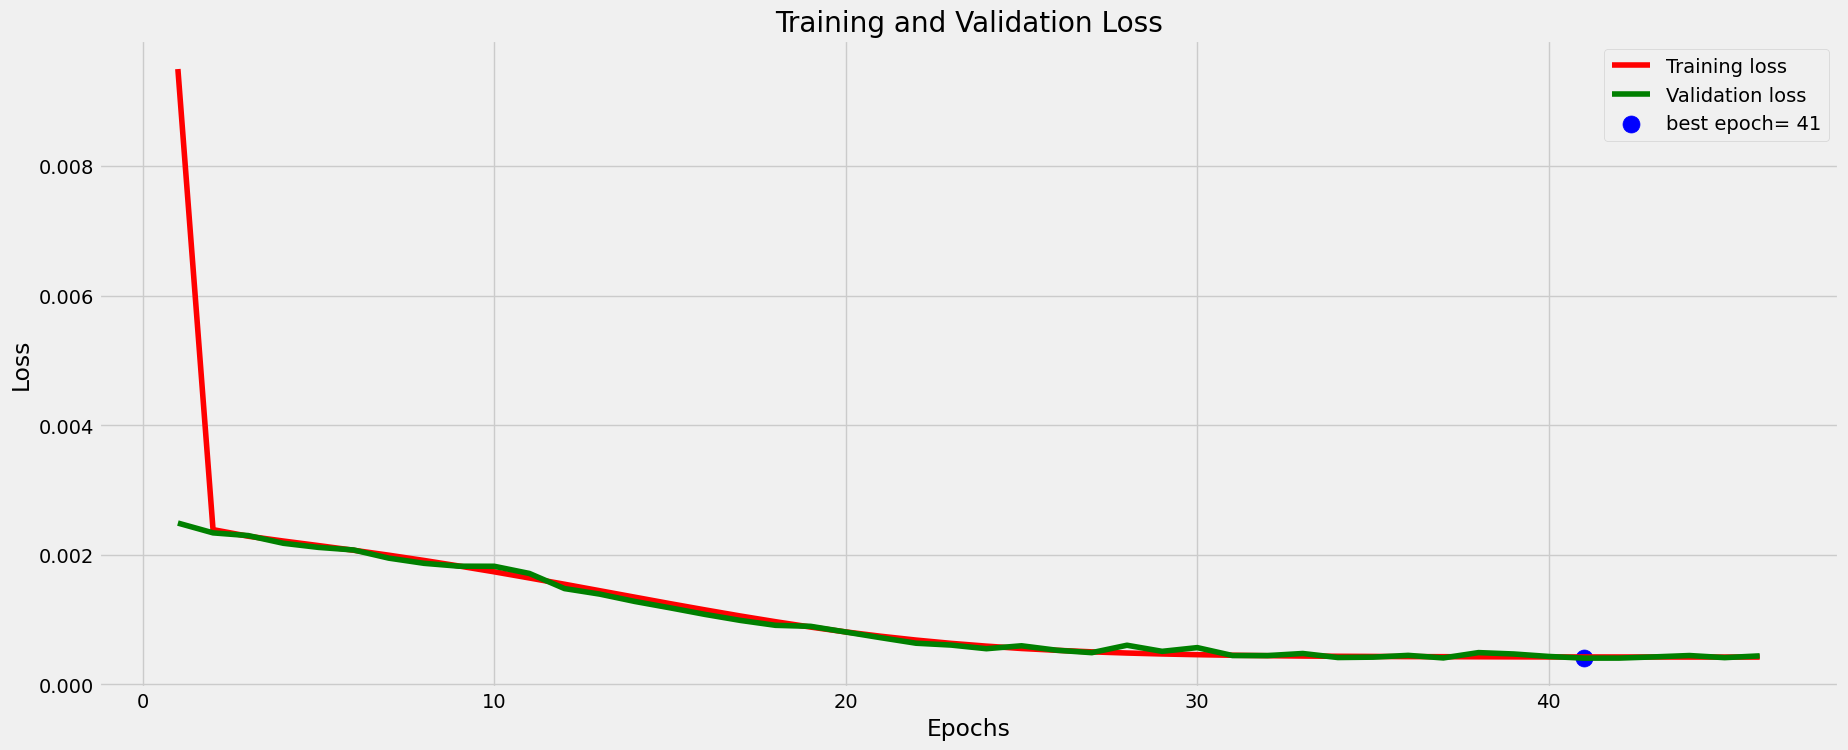

In [40]:
# Define needed variables
tr_loss = history4.history['loss']
val_loss = history4.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()


In [41]:
max(history4.history['val_r2_score'])

0.8442294597625732

**Models Hyperparameters Tuning:**

Model1: 

    - The arch was 4 dense layers with 2 (0.1) dropout layers 
    - Used ADAM optimizer with learning rate 0.001
    -> the model took 54 epochs with batch_size = 64 to use the callback
    -> it has a maximum validation r2_score = -0.2252
    
Model2: 

    - The arch was 3 dense layers with 1 (0.1) dropout layer
    - Used ADAM optimizer with learning rate 0.0001
    -> the model took 8 epochs with batch_size = 64 to use the callback
    -> it has a maximum validation r2_score = 0.436
    
Model3: 

    - The arch was 3 dense layers with no dropout layer
    - Used ADAM optimizer with learning rate 0.001
    -> the model took 16 epochs with batch_size = 64 to use the callback 
    -> it has a maximum validation r2_score = 0.8448

Model4: 

    - The arch was 2 dense layers with no dropout layer
    - Used SGD optimizer with learning rate 0.001
    -> the model took 46 epochs with batch_size = 32 to use the callback 
    -> it has a maximum validation r2_score = 0.8442
    
    
* After combaring the results, we could use the third model to predict our test data

In [67]:
y_pred = model3.predict(test)
y_pred


23291/23291 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


array([[0.57435596],
       [0.4567316 ],
       [0.4567766 ],
       ...,
       [0.6272819 ],
       [0.5517853 ],
       [0.5134536 ]], dtype=float32)

**Prepare the submission File**

In [78]:
# make y_pred a 1d array
y_pred = y_pred.reshape(y_pred.shape[0])

In [79]:
submission = pd.DataFrame({'id': test.index.values, 'FloodProbability': y_pred}, columns=['id', 'FloodProbability'])

submission.to_csv('submission.csv', index=False)

**THANK YOU!**